# Section 1: Data Ingestion & Environment Setup

In [1]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from h2o.automl import H2OAutoML

In [3]:
h2o.init(max_mem_size="8G")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "17.0.14" 2025-01-21; OpenJDK Runtime Environment (build 17.0.14+7); OpenJDK 64-Bit Server VM (build 17.0.14+7, mixed mode, sharing)
  Starting server from /home/mnm/PycharmProjects/gtd/.venv/lib/python3.13/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpnkx7x749
  JVM stdout: /tmp/tmpnkx7x749/h2o_mnm_started_from_python.out
  JVM stderr: /tmp/tmpnkx7x749/h2o_mnm_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Africa/Cairo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_mnm_60zlv5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [4]:
path = "gtd.csv"
data = h2o.import_file(path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
df = data.head().as_data_frame()
df

/home/mnm/PycharmProjects/gtd/.venv/lib/python3.13/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqu� to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [6]:
data.describe()

Rows:181691
Cols:135

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
type,int,int,int,int,enum,int,time,int,enum,int,enum,enum,enum,real,real,int,int,enum,string,int,int,int,int,int,enum,int,int,int,int,enum,int,enum,int,string,int,enum,int,enum,enum,enum,int,enum,int,enum,int,enum,enum,enum,int,enum,int,enum,int,enum,string,enum,int,enum,enum,enum,enum,int,int,int,enum,int,int,int,int,int,real,int,int,enum,int,int,enum,int,int,int,int,int,enum,int,enum,int,enum,int,enum,int,enum,int,enum,int,enum,int,string,enum,int,int,int,real,int,int,int,int,enum,real,enum,int,int,int,real,int,enum,enum,int,real,real,real,int,enum,int,enum,int,string,enum,enum,enum,enum,int,int,int,int,enum
mins,197000000001.0,1970.0,0.0,0.0,,0.0,5702400000.0,4.0,,1.0,,,,-53.154613,-86185896.0,1.0,-9.0,,NaN,0.0,0.0,0.0,-9.0,1.0,,0.0,0.0,0.0,1.0,,1.0,,1.0,NaN,1.0,,1.0,,,,4.0,,1.0,,1.0,,,,4.0,,1.0,,1.0,,NaN,,4.0,,,,,NaN,NaN,NaN,,0.0,0.0,0.0,0.0,-99.0,-99.0,-9.0,1.0,,-9.0,1.0,,0.0,1.0,NaN,-9.0,1.0,,1.0,,1.0,,1.0,,2.0,,1.0,,5.0,,2.0,NaN,,0.0,0.0,0.0,0.0,0.0,0.0,-9.0,1.0,,-99.0,,-9.0,-99.0,-99.0,-99.0,-99.0,,,-9.0,-99.0,-99.0,-99.0,-99.0,,1.0,,-99.0,NaN,,,,,-9.0,-9.0,-9.0,-9.0,
mean,200270523949.2457,2002.6389969783863,6.467276860163687,15.505644198116578,,0.04534621968066663,815450867027.027,131.96850146677605,,7.160938076184291,,,,23.49834295928528,-458.69565302484096,1.4514516883617246,0.06829727394312321,,NaN,0.9885299767187148,0.9930926683214909,0.8756680297868359,-0.5231713357917331,1.292923373892662,,0.13777313005668998,0.8895982739926579,0.036507036672152174,3.2475466588878907,,3.7195121951219514,,5.2453271028037385,NaN,8.439719083498902,,46.97147410079502,,,,127.68644105433798,,10.24721823402728,,55.31165184838559,,,,131.17944218692278,,10.021258503401361,,55.54876937101185,,NaN,,144.56495204882302,,,,,0.0,0.0,0.0,,0.08144017737478697,0.26547314578005116,0.19375000000000003,0.002950063569466842,-65.36115431920128,-1.5177269567387388,0.04966643881250476,7.022847560656079,,0.24761904761904763,7.1769480519480515,,0.4119496855345912,6.7293233082706765,0.0,-6.29634221946683,6.447325404120182,,11.117161623882236,,6.8125238058962445,,10.754028764512217,,6.911433172302737,,11.643236857649143,,6.2465753424657535,,10.842857142857143,0.0,,2.403272298661439,0.0459806388332125,0.5080578386340457,3.167668400048373,0.03894383232611614,0.10716316593808864,-0.5445564172138411,3.295403106220245,,208811.86872733003,,0.05905362150369395,4.533230179781905,-0.35399866834356747,-46.79393305439331,-32.516371245691786,,,-0.14581098719323868,3172529.887177777,578486.5304618117,717943.701485788,240.3786231884058,,4.629242107178601,,-29.01826923076923,NaN,,,,,-4.543

# Section 2: Data Cleaning & Target Setup

In [7]:
columns_to_keep = [
    "iyear", "imonth", "iday",
    "country_txt", "region_txt", "provstate", "city",
    "latitude", "longitude",
    "success", "suicide",
    "attacktype1", "targtype1", "weaptype1",
    "nkill", "nwound",
    "gname", "individual",
    "ishostkid", "ransom",
    "claimed", "claimmode",
]

data = data[columns_to_keep]

In [8]:
df = data.head().as_data_frame()
df

/home/mnm/PycharmProjects/gtd/.venv/lib/python3.13/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,...,targtype1,weaptype1,nkill,nwound,gname,individual,ishostkid,ransom,claimed,claimmode
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,...,14,13,1.0,0.0,MANO-D,0,0,0,NaN,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,...,7,13,0.0,0.0,23rd of September Communist League,0,1,1,NaN,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,...,10,13,1.0,0.0,Unknown,0,0,0,NaN,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,...,7,6,NaN,NaN,Unknown,0,0,0,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,...,7,8,NaN,NaN,Unknown,0,0,0,NaN,NaN
5,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,1,...,3,5,0.0,0.0,Black Nationalists,0,0,0,0.0,NaN
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,0,...,3,5,0.0,0.0,Tupamaros (Uruguay),0,0,0,NaN,NaN
7,1970,1,2,United States,North America,California,Oakland,37.791927,-122.225906,1,...,21,6,0.0,0.0,Unknown,0,0,0,0.0,NaN
8,1970,1,2,United States,North America,Wisconsin,Madison,43.076592,-89.412488,1,...,4,8,0.0,0.0,New Year's Gang,0,0,0,1.0,1.0
9,1970,1,3,United States,North America,Wisconsin,Madison,43.072950,-89.386694,1,...,2,8,0.0,0.0,New Year's Gang,0,0,0,0.0,NaN


In [9]:
data = data[data["attacktype1"].isna() == False]
data.dim

[181691, 22]

In [10]:
data = data[data["nkill"].isna() == False]
data = data[data["nwound"].isna() == False]
data.dim

[164817, 22]

In [11]:
for col in data.columns:
    if data[col].isnumeric()[0]:
        data.impute(col, method='mean')
    else:
        data.impute(col, method='mode')
        data[col] = data[col].asfactor()

data.describe()

Rows:164817
Cols:22

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1,targtype1,weaptype1,nkill,nwound,gname,individual,ishostkid,ransom,claimed,claimmode
type,int,int,int,enum,enum,enum,enum,real,real,int,int,int,int,int,int,real,enum,int,real,real,real,real
mins,1970.0,0.0,0.0,,,,,-53.154613,-86185896.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,,0.0,-9.0,-9.0,-9.0,1.0
mean,2003.1887548007794,6.482498771364606,15.517671114023429,,,,,23.697170744464536,-505.47705644850777,0.8822997627671902,0.03719883264469078,3.19332350425017,8.432437187911438,6.389747416832002,2.1312971356110095,3.1648312977423423,,0.003203553031544076,0.04987216159260541,-0.14710893328307575,0.05542729490498839,6.995446685878961
maxs,2017.0,12.0,31.0,,,,,74.633553,179.366667,1.0,1.0,9.0,22.0,13.0,1384.0,8191.0,,1.0,1.0,1.0,1.0,10.0
sigma,12.775568403504732,3.3875200739472393,8.806272579640053,,,,,18.078370328761146,212292.83357248432,0.32225381528522123,0.1892492980118477,1.870862962082324,6.682799862370372,2.072370950640487,9.808937277896382,36.002284506153416,,0.05650937669447885,0.39497721527772245,0.7667555982983265,0.8500419571310586,0.8158993088414153
zeros,0,9,700,,,,,0,0,19399,158686,0,0,0,87444,103127,,164289,154459,64072,88447,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1970.0,7.0,2.0,Dominican Republic,Central America & Caribbean,Baghdad,Santo Domingo,18.456792,-69.951164,1.0,0.0,1.0,14.0,13.0,1.0,0.0,MANO-D,0.0,0.0,0.0,0.055427294904988406,6.995446685878963
1,1970.0,0.0,0.0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,6.0,7.0,13.0,0.0,0.0,23rd of September Communist League,0.0,1.0,1.0,0.055427294904988406,6.995446685878963
2,1970.0,1.0,0.0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1.0,0.0,1.0,10.0,13.0,1.0,0.0,Unknown,0.0,0.0,0.0,0.055427294904988406,6.995446685878963


In [12]:
categorical_columns = [
    "country_txt", "region_txt", "provstate", "city",
    "gname", "attacktype1", "targtype1", "weaptype1",
    "ransom", "claimed", "claimmode", "suicide", "success",
]

for col in categorical_columns:
    if data.type(col) == "real":
        data[col] = data[col].round().ascharacter().asfactor()
    else:
        data[col] = data[col].ascharacter().asfactor()

In [13]:
data.describe()

Rows:164817
Cols:22

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1,targtype1,weaptype1,nkill,nwound,gname,individual,ishostkid,ransom,claimed,claimmode
type,int,int,int,enum,enum,enum,enum,real,real,enum,enum,enum,enum,enum,int,real,enum,int,real,enum,enum,enum
mins,1970.0,0.0,0.0,,,,,-53.154613,-86185896.0,,,,,,0.0,0.0,,0.0,-9.0,,,
mean,2003.1887548007794,6.482498771364606,15.517671114023429,,,,,23.697170744464536,-505.47705644850777,,,,,,2.1312971356110095,3.1648312977423423,,0.003203553031544076,0.04987216159260541,,,
maxs,2017.0,12.0,31.0,,,,,74.633553,179.366667,,,,,,1384.0,8191.0,,1.0,1.0,,,
sigma,12.775568403504732,3.3875200739472393,8.806272579640053,,,,,18.078370328761146,212292.83357248432,,,,,,9.808937277896382,36.002284506153416,,0.05650937669447885,0.39497721527772245,,,
zeros,0,9,700,,,,,0,0,,,,,,87444,103127,,164289,154459,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1970.0,7.0,2.0,Dominican Republic,Central America & Caribbean,Baghdad,Santo Domingo,18.456792,-69.951164,1,0,1,14,13,1.0,0.0,MANO-D,0.0,0.0,0,0,7
1,1970.0,0.0,0.0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,0,6,7,13,0.0,0.0,23rd of September Communist League,0.0,1.0,1,0,7
2,1970.0,1.0,0.0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,1,10,13,1.0,0.0,Unknown,0.0,0.0,0,0,7


# Section 3: Exploratory Data Analysis (EDA) + Heatmap

In [14]:
df_pd = data.as_data_frame(use_pandas=True, header=True)

/home/mnm/PycharmProjects/gtd/.venv/lib/python3.13/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


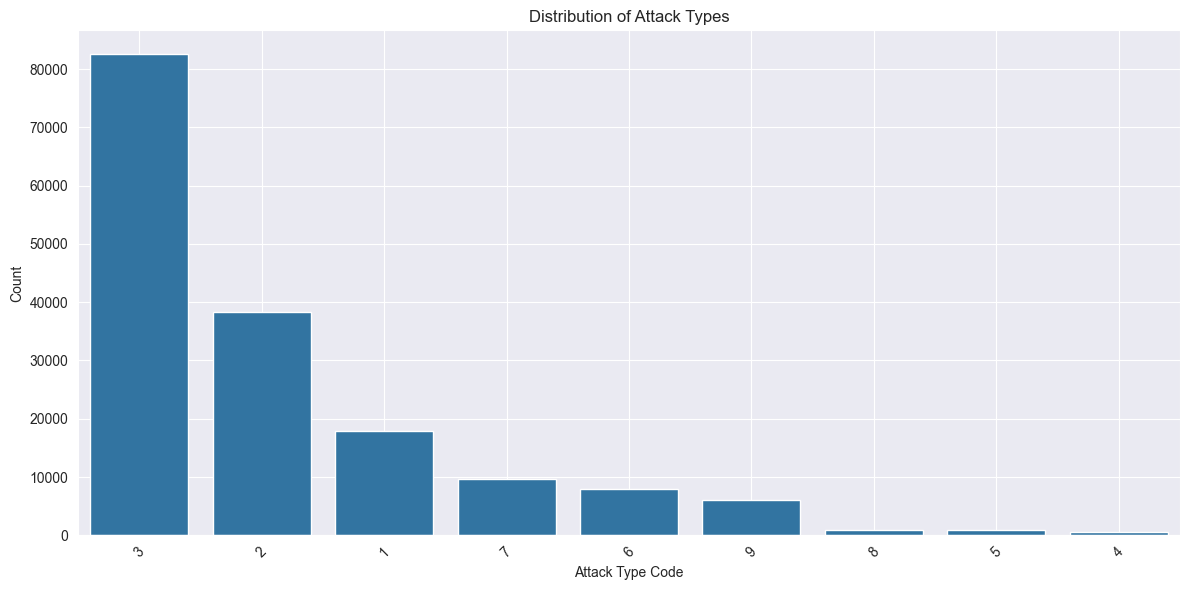

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='attacktype1', data=df_pd, order=df_pd['attacktype1'].value_counts().index)
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install json

In [ ]:
import json

# Get overall performance metrics
metrics_dict = {
    "model_id": aml.leader.model_id,
    "overall_metrics": {
        "accuracy": perf.accuracy(),
        "precision": perf.precision(),
        "recall": perf.recall(),
        "f1": perf.F1(),
        "logloss": perf.logloss()
    },
    "per_class_metrics": {}
}

# Add per-class metrics
for i in range(perf.confusion_matrix().dimension[0]):
    class_name = perf.confusion_matrix().table.index[i]
    metrics_dict["per_class_metrics"][class_name] = {
        "precision": perf.precision(cls=i),
        "recall": perf.recall(cls=i),
        "f1": perf.F1(cls=i)
    }

# Add confusion matrix
metrics_dict["confusion_matrix"] = cm.to_dict()

# Add per-region performance
region_predictions = aml.leader.predict(test)
test_df = test.as_data_frame()
test_df['predicted'] = region_predictions.as_data_frame()

region_metrics = {}
for region in test_df['region_txt'].unique():
    region_mask = test_df['region_txt'] == region
    region_actual = test_df[region_mask]['attacktype1']
    region_pred = test_df[region_mask]['predicted']
    correct = (region_actual == region_pred).sum()
    total = len(region_actual)
    region_metrics[region] = {
        "accuracy": correct / total,
        "samples": total
    }

metrics_dict["region_performance"] = region_metrics

# Save to JSON
with open("model_metrics.json", "w") as f:
    json.dump(metrics_dict, f, indent=4)

print("Performance metrics saved to model_metrics.json")


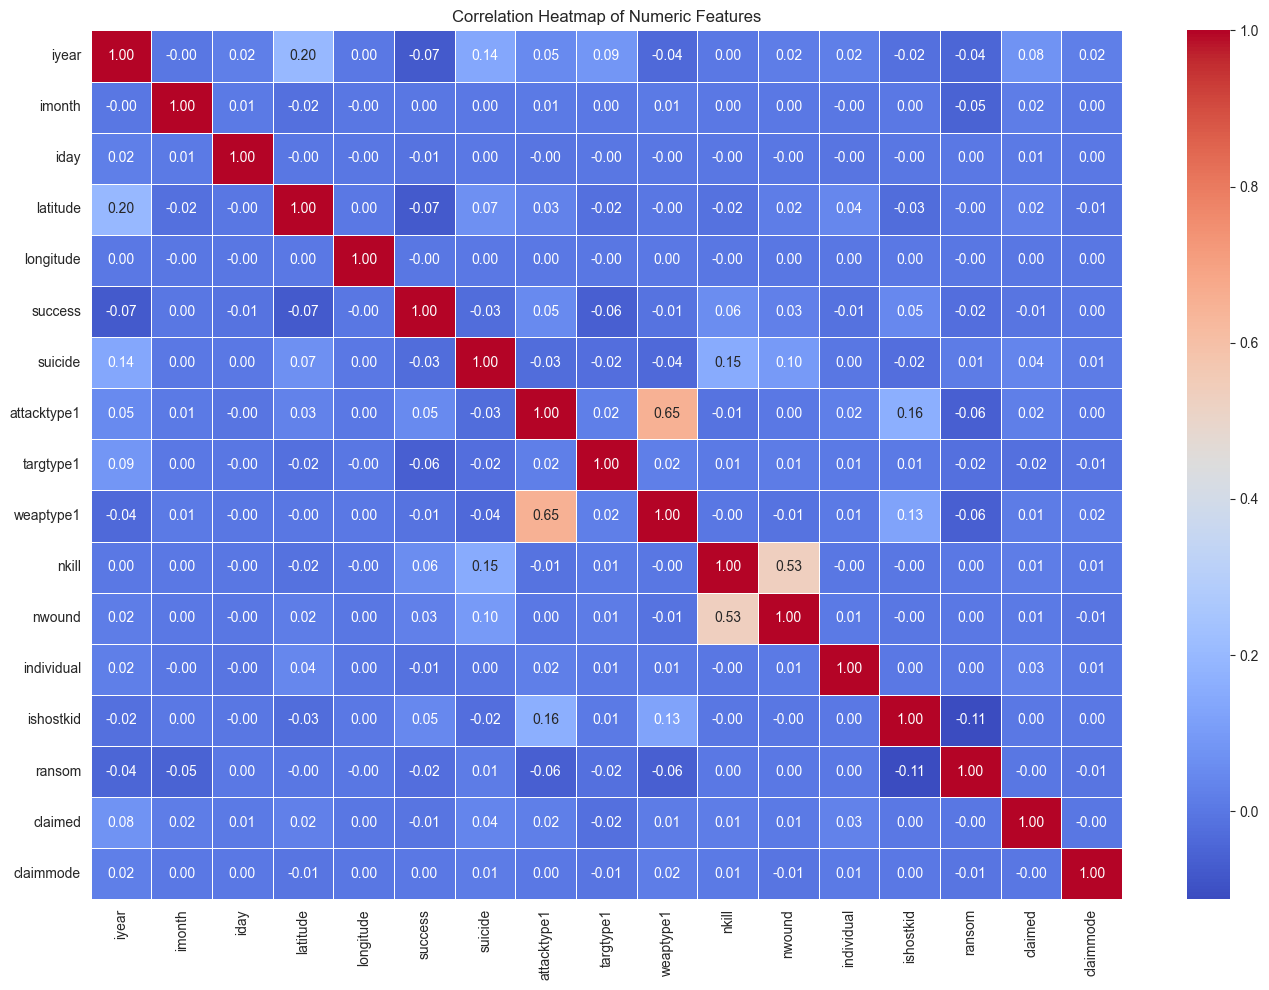

In [16]:
numeric_df = df_pd.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(14, 10))
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

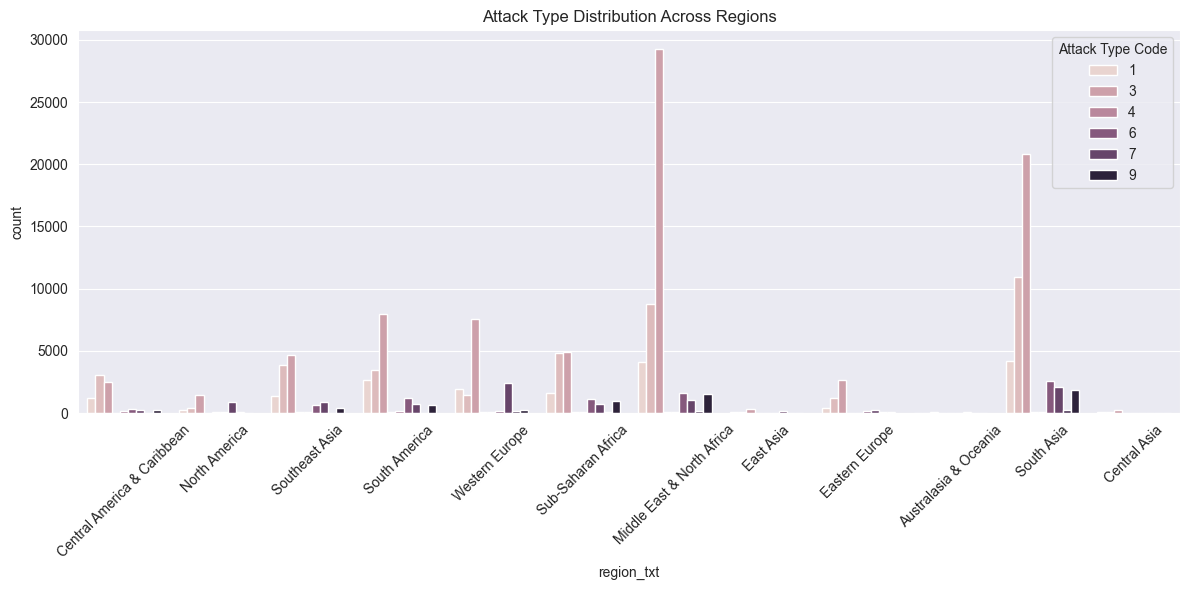

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='region_txt', hue='attacktype1', data=df_pd)
plt.title('Attack Type Distribution Across Regions')
plt.xticks(rotation=45)
plt.legend(title='Attack Type Code')
plt.tight_layout()
plt.show()

In [18]:
cols_to_drop = ['eventid', 'summary', 'scite1', 'scite2', 'scite3', 'notes', 'location']
df_pd = df_pd.drop(columns=[c for c in cols_to_drop if c in df_pd.columns])

# Section 4: H2O AutoML for Multiclass Classification of attacktype1

In [19]:
target = "attacktype1"
features = [col for col in data.columns if col != target]

In [20]:
train, test = data.split_frame(ratios=[0.8], seed=1234)

In [21]:
aml = H2OAutoML(
    max_models=10,
    max_runtime_secs=2700,         # 45 min cap
    nfolds=3,                      # light CV so ensembles still work
    exclude_algos=['DeepLearning'],# skip heavy nets
    stopping_metric='AUTO',
    stopping_rounds=5,
    balance_classes=True,
    seed=1
)

In [22]:
aml.train(x=features, y=target, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20250418_232146


Model Summary: 
    number_of_trees
--  -----------------
    76

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.04416744519720087
RMSE: 0.2101605224517699
LogLoss: 0.15501955695947084
Mean Per-Class Error: 0.12198881919842691
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
1      2      3      4    5    6     7     8    9     Error      Rate
-----  -----  -----  ---  ---  ----  ----  ---  ----  ---------  ---------------
11512  1796   853    0    2    74    29    1    93    0.198329   2,848 / 14,360
900    28274  857    4    26   113   348   16   39    0.075318   2,303 / 30,577
156    403    65388  2    6    8     69    9    47    0.0105919  700 / 66,088
8      56     18     288  7    44    20    1    11    0.364238   165 / 453
4      31     8      3    516  92    4     0    7     0.22406    149 / 665
43     71     8      6    7    6255  3     2    21    0.0250935  161 / 6,416
42     361    11     0    3    15    7266  16   64    0.0658267  512 / 7,778
18     51     6      0    0    2     7     643  0     0.115543   84 / 727
60     6      4      3    0    12    8     0    4828  0.0188986  93 / 4,921
12743  31049  67153  306  567  6615  7754  688  5110  0.05315    7,015 / 131,985

Top-9 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.94685
2    0.994605
3    0.998932
4    0.999712
5    0.999901
6    0.999962
7    0.999985
8    1
9    1

ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.0788039099906707
RMSE: 0.2807203412484936
LogLoss: 0.28415155973525136
Mean Per-Class Error: 0.24331637743137083
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
1      2      3      4    5    6     7     8    9     Error      Rate
-----  -----  -----  ---  ---  ----  ----  ---  ----  ---------  ----------------
9695   2839   1308   2    2    148   57    14   295   0.324861   4,665 / 14,360
1762   26529  1143   12   56   258   674   92   51    0.132387   4,048 / 30,577
417    573    64806  6    13   20    115   12   126   0.0193984  1,282 / 66,088
10     72     23     192  15   88    27    3    23    0.576159   261 / 453
7      67     24     11   299  230   7     2    18    0.550376   366 / 665
76     152    22     26   65   6018  7     2    48    0.0620324  398 / 6,416
57     709    33     5    8    29    6758  41   138   0.131139   1,020 / 7,778
28     154    12     2    1    1     34    495  0     0.31912    232 / 727
198    7      46     4    5    42    64    0    4555  0.0743751  366 / 4,921
12250  31102  67417  260  464  6834  7743  661  5254  0.0957533  12,638 / 131,985

Top-9 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.904247
2    0.983566
3    0.994227
4    0.997757
5    0.999189
6    0.999629
7    0.999871
8    0.999954
9    1

Cross-Validation Metrics Summary: 
                         mean       sd           cv_1_valid    cv_2_valid    cv_3_valid
-----------------------  ---------  -----------  ------------  ------------  ------------
accuracy                 0.904247   0.000764188  0.903875      0.903739      0.905126
aic                      nan        0            nan           nan           nan
auc                      nan        0            nan        

In [23]:
lb = aml.leaderboard
lb.head(rows=10)

model_id,mean_per_class_error,logloss,rmse,mse
XGBoost_1_AutoML_1_20250418_232146,0.243316,0.284152,0.28072,0.0788039
GLM_1_AutoML_1_20250418_232146,0.888889,6.61713,0.99403,0.988096


In [24]:
perf = aml.leader.model_performance(test_data=test)
print(perf)

ModelMetricsMultinomial: xgboost
** Reported on test data. **

MSE: 0.07836222433870155
RMSE: 0.2799325353343222
LogLoss: 0.28059558309643173
Mean Per-Class Error: 0.24590865308521823
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
1     2     3      4    5    6     7     8    9     Error      Rate
----  ----  -----  ---  ---  ----  ----  ---  ----  ---------  --------------
2472  691   298    0    1    48    16    7    74    0.314666   1,135 / 3,607
433   6646  310    4    9    52    171   36   11    0.133733   1,026 / 7,672
105   151   16107  0    1    5     25    3    26    0.0192413  316 / 16,423
1     22    6      56   2    30 

In [28]:
cm = perf.confusion_matrix().as_data_frame()
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
        1       2        3     4     5       6       7      8       9  \
0  2472.0   691.0    298.0   0.0   1.0    48.0    16.0    7.0    74.0   
1   433.0  6646.0    310.0   4.0   9.0    52.0   171.0   36.0    11.0   
2   105.0   151.0  16107.0   0.0   1.0     5.0    25.0    3.0    26.0   
3     1.0    22.0      6.0  56.0   2.0    30.0     6.0    1.0    12.0   
4     0.0    19.0      6.0   2.0  67.0    69.0     2.0    0.0     8.0   
5    21.0    41.0      3.0   8.0  14.0  1480.0     4.0    0.0    12.0   
6    14.0   191.0      6.0   1.0   2.0     7.0  1599.0   14.0    30.0   
7    10.0    25.0      0.0   0.0   1.0     0.0    15.0  138.0     0.0   
8    46.0     0.0     12.0   0.0   0.0     8.0    14.0    0.0  1105.0   
9  3102.0  7786.0  16748.0  71.0  97.0  1699.0  1852.0  199.0  1278.0   

      Error            Rate  
0  0.314666   1,135 / 3,607  
1  0.133733   1,026 / 7,672  
2  0.019241    316 / 16,423  
3  0.588235        80 / 136  
4  0.612717       106 / 173 

In [ ]:

# Extract performance


In [37]:
def parse_value(val):
    try:
        return int(val.split(' / ')[0])
    except Exception as e:
        return val

cm.iloc[:, 1:] = cm.iloc[:, 1:].applymap(parse_value)

cm.set_index(cm.columns[0], inplace=True)

/tmp/ipykernel_15491/31163770.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cm.iloc[:, 1:] = cm.iloc[:, 1:].applymap(parse_value)


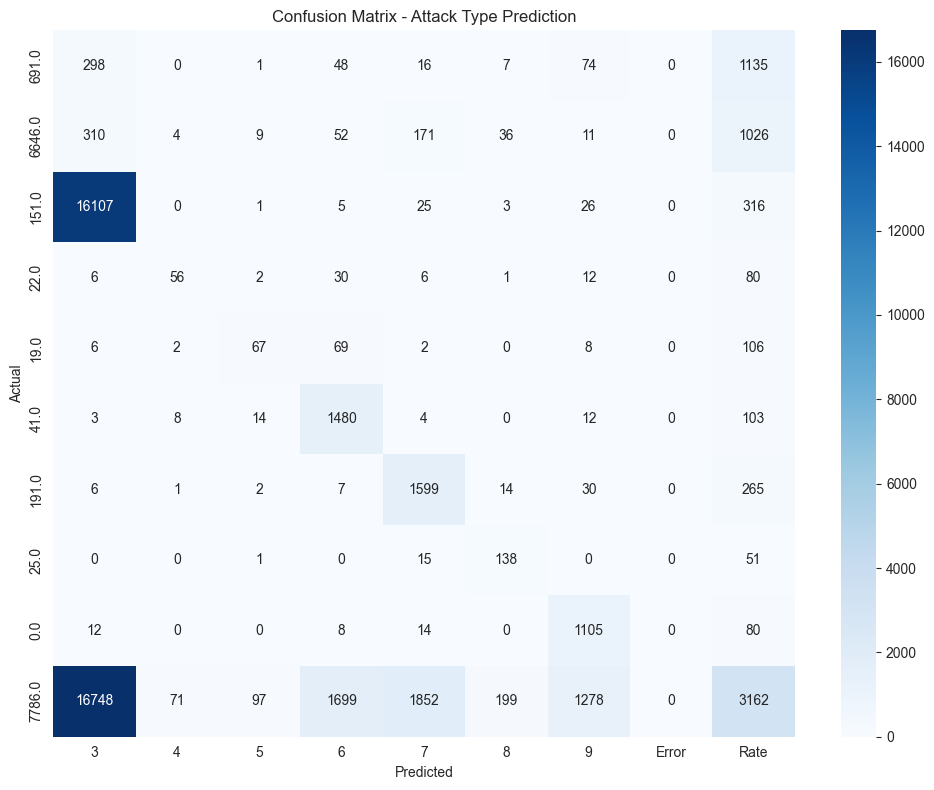

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm.astype(int), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Attack Type Prediction")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

In [44]:
lb = aml.leaderboard
lb.as_data_frame().to_csv("automl_leaderboard.csv", index=False)
print("Leaderboard exported as automl_leaderboard.csv")

Leaderboard exported as automl_leaderboard.csv


/home/mnm/PycharmProjects/gtd/.venv/lib/python3.13/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Saved model to: /home/mnm/PycharmProjects/gtd/best_model/XGBoost_1_AutoML_1_20250418_232146


In [ ]:

#
